In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **LINEAR REGRESSION**


### y= mx+b

In [10]:
df = pd.read_csv("housing.csv")
df

,Area,Price
0,1000,150000
1,1200,180000
2,1250,200000
3,1500,220000
4,2000,400000
5,2200,450000


In [11]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(df[['Area']], df['Price'])

LinearRegression()

In [12]:
input_value = np.array([[1550]])

# Make predictions using the linear regression model
predicted_price = reg.predict(input_value)

print(predicted_price)

[273165.02012441]


In [13]:
reg.predict([[1550]])

array([273165.02012441])

In [14]:
reg. coef_

array([259.93413831])

In [15]:
reg. intercept_

-129732.89425539697

In [31]:
# y= mx+ b
259.93413831 * 1550 + -129732.89425539697

273165.020125103

In [32]:
# Step 1: Extract 'Area' values and convert to a 2D array-like format
areas_to_predict = df[['Area']]  # Extract the 'Area' column as a DataFrame
areas_array = areas_to_predict.to_numpy()  # Convert to a NumPy array (2D)

# Step 2: Use the predict method to make predictions for 'Area' values
predicted_prices = reg.predict(areas_array)

# Step 3: Store the predicted prices in a new column in your DataFrame or in a separate array
# Option 1: Add the predicted prices as a new column in the existing DataFrame
df['Predicted_Price'] = predicted_prices


In [33]:
df

,Area,Price,Predicted_Price
0,1000,150000,130201.244054
1,1200,180000,182188.071716
2,1250,200000,195184.778632
3,1500,220000,260168.313209
4,2000,400000,390135.382364
5,2200,450000,442122.210026


### Multivariable dependency of Linear Regression

In [12]:
area = [2600,3000,3200,3600,4000]
bedrooms = [3.0 , 4.0 , 3.0 , 3.0 , 5.0]
age = [20, 15, 18, 30, 8]
price = [550000, 565000, 610000, 595000, 760000]

In [13]:
df = pd.DataFrame({"Area" : area ,  "Bedrooms" : bedrooms , "Age" : age , "Price" : price})
df

,Area,Bedrooms,Age,Price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [14]:
reg = linear_model.LinearRegression()
reg.fit(df[['Area' , 'Bedrooms' , 'Age']], df['Price'])

LinearRegression()

In [15]:
reg. coef_

array([   137.25, -26025.  ,  -6825.  ])

In [16]:
reg.intercept_

383724.9999999998

In [55]:
reg.predict([[3000,3,1]])

array([710575.])

# GRADIENT DECENT AND COST FUNCTION

### mean squaraed error = 1/n sum( (Y  - Y predicted)^2) ;  it is also a type of cost function(most popular is MSE)
### cost function = 1/n sum( (Y  - (mx + b))^2)

### In the case of a univariate function, it is simply the first derivative at a selected point. In the case of a multivariate function, it is a vector of derivatives in each main direction (along variable axes). Because we are interested only in a slope along one axis and we don’t care about others these derivatives are called partial derivatives.

### Gradient descent algorithm does not work for all functions. There are two specific requirements. A function has to be:
### 1. differentiable
### 2. convex(2nd derivative should be greater than 0)

### There’s an important parameter η which scales the gradient and thus controls the step size. In machine learning, it is called learning rate and have a strong influence on performance.

### 1. The smaller learning rate the longer GD converges, or may reach maximum iteration before reaching the optimum point
### 2. If learning rate is too big the algorithm may not converge to the optimal point (jump around) or even to diverge completely.

In [10]:
def gradient_descent(x, y) : 
    m_curr = b_curr = 0
    n = len (x) 
    learning_rate = 0.008 
    iterations = 10000
    
    for i in range (iterations):
        y_predicted = m_curr*x + b_curr
        cost = (1/n) * sum ( [val**2 for val in (y-y_predicted) ])
        md=-(2/n) *sum (x* (y-y_predicted))
        bd=-(2/n) *sum ((y-y_predicted))
        m_curr = m_curr - learning_rate * iterations
        b_curr = b_curr - learning_rate * iterations
        print(m_curr , b_curr , cost , i)



In [13]:
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

In [12]:
gradient_descent(x,y)

-80.0 -80.0 89.0 0
-160.0 -160.0 121689.0 1
-240.0 -240.0 473689.0 2
-320.0 -320.0 1056089.0 3
-400.0 -400.0 1868889.0 4
-480.0 -480.0 2912089.0 5
-560.0 -560.0 4185689.0 6
-640.0 -640.0 5689689.0 7
-720.0 -720.0 7424089.0 8
-800.0 -800.0 9388889.0 9
-880.0 -880.0 11584089.0 10
-960.0 -960.0 14009689.0 11
-1040.0 -1040.0 16665689.0 12
-1120.0 -1120.0 19552089.0 13
-1200.0 -1200.0 22668889.0 14
-1280.0 -1280.0 26016089.0 15
-1360.0 -1360.0 29593689.0 16
-1440.0 -1440.0 33401689.0 17
-1520.0 -1520.0 37440089.0 18
-1600.0 -1600.0 41708889.0 19
-1680.0 -1680.0 46208089.0 20
-1760.0 -1760.0 50937689.0 21
-1840.0 -1840.0 55897689.0 22
-1920.0 -1920.0 61088089.0 23
-2000.0 -2000.0 66508889.0 24
-2080.0 -2080.0 72160089.0 25
-2160.0 -2160.0 78041689.0 26
-2240.0 -2240.0 84153689.0 27
-2320.0 -2320.0 90496089.0 28
-2400.0 -2400.0 97068889.0 29
-2480.0 -2480.0 103872089.0 30
-2560.0 -2560.0 110905689.0 31
-2640.0 -2640.0 118169689.0 32
-2720.0 -2720.0 125664089.0 33
-2800.0 -2800.0 133388889.0 3

-39920.0 -39920.0 28573248089.0 498
-40000.0 -40000.0 28688108889.0 499
-40080.0 -40080.0 28803200089.0 500
-40160.0 -40160.0 28918521689.0 501
-40240.0 -40240.0 29034073689.0 502
-40320.0 -40320.0 29149856089.0 503
-40400.0 -40400.0 29265868889.0 504
-40480.0 -40480.0 29382112089.0 505
-40560.0 -40560.0 29498585689.0 506
-40640.0 -40640.0 29615289689.0 507
-40720.0 -40720.0 29732224089.0 508
-40800.0 -40800.0 29849388889.0 509
-40880.0 -40880.0 29966784089.0 510
-40960.0 -40960.0 30084409689.0 511
-41040.0 -41040.0 30202265689.0 512
-41120.0 -41120.0 30320352089.0 513
-41200.0 -41200.0 30438668889.0 514
-41280.0 -41280.0 30557216089.0 515
-41360.0 -41360.0 30675993689.0 516
-41440.0 -41440.0 30795001689.0 517
-41520.0 -41520.0 30914240089.0 518
-41600.0 -41600.0 31033708889.0 519
-41680.0 -41680.0 31153408089.0 520
-41760.0 -41760.0 31273337689.0 521
-41840.0 -41840.0 31393497689.0 522
-41920.0 -41920.0 31513888089.0 523
-42000.0 -42000.0 31634508889.0 524
-42080.0 -42080.0 3175536008

-80000.0 -80000.0 114976108889.0 999
-80080.0 -80080.0 115206400089.0 1000
-80160.0 -80160.0 115436921689.0 1001
-80240.0 -80240.0 115667673689.0 1002
-80320.0 -80320.0 115898656089.0 1003
-80400.0 -80400.0 116129868889.0 1004
-80480.0 -80480.0 116361312089.0 1005
-80560.0 -80560.0 116592985689.0 1006
-80640.0 -80640.0 116824889689.0 1007
-80720.0 -80720.0 117057024089.0 1008
-80800.0 -80800.0 117289388889.0 1009
-80880.0 -80880.0 117521984089.0 1010
-80960.0 -80960.0 117754809689.0 1011
-81040.0 -81040.0 117987865689.0 1012
-81120.0 -81120.0 118221152089.0 1013
-81200.0 -81200.0 118454668889.0 1014
-81280.0 -81280.0 118688416089.0 1015
-81360.0 -81360.0 118922393689.0 1016
-81440.0 -81440.0 119156601689.0 1017
-81520.0 -81520.0 119391040089.0 1018
-81600.0 -81600.0 119625708889.0 1019
-81680.0 -81680.0 119860608089.0 1020
-81760.0 -81760.0 120095737689.0 1021
-81840.0 -81840.0 120331097689.0 1022
-81920.0 -81920.0 120566688089.0 1023
-82000.0 -82000.0 120802508889.0 1024
-82080.0 -820

-120640.0 -120640.0 261634489689.0 1507
-120720.0 -120720.0 261981824089.0 1508
-120800.0 -120800.0 262329388889.0 1509
-120880.0 -120880.0 262677184089.0 1510
-120960.0 -120960.0 263025209689.0 1511
-121040.0 -121040.0 263373465689.0 1512
-121120.0 -121120.0 263721952089.0 1513
-121200.0 -121200.0 264070668889.0 1514
-121280.0 -121280.0 264419616089.0 1515
-121360.0 -121360.0 264768793689.0 1516
-121440.0 -121440.0 265118201689.0 1517
-121520.0 -121520.0 265467840089.0 1518
-121600.0 -121600.0 265817708889.0 1519
-121680.0 -121680.0 266167808089.0 1520
-121760.0 -121760.0 266518137689.0 1521
-121840.0 -121840.0 266868697689.0 1522
-121920.0 -121920.0 267219488089.0 1523
-122000.0 -122000.0 267570508889.0 1524
-122080.0 -122080.0 267921760089.0 1525
-122160.0 -122160.0 268273241689.0 1526
-122240.0 -122240.0 268624953689.0 1527
-122320.0 -122320.0 268976896089.0 1528
-122400.0 -122400.0 269329068889.0 1529
-122480.0 -122480.0 269681472089.0 1530
-122560.0 -122560.0 270034105689.0 1531


-160560.0 -160560.0 463581785689.0 2006
-160640.0 -160640.0 464044089689.0 2007
-160720.0 -160720.0 464506624089.0 2008
-160800.0 -160800.0 464969388889.0 2009
-160880.0 -160880.0 465432384089.0 2010
-160960.0 -160960.0 465895609689.0 2011
-161040.0 -161040.0 466359065689.0 2012
-161120.0 -161120.0 466822752089.0 2013
-161200.0 -161200.0 467286668889.0 2014
-161280.0 -161280.0 467750816089.0 2015
-161360.0 -161360.0 468215193689.0 2016
-161440.0 -161440.0 468679801689.0 2017
-161520.0 -161520.0 469144640089.0 2018
-161600.0 -161600.0 469609708889.0 2019
-161680.0 -161680.0 470075008089.0 2020
-161760.0 -161760.0 470540537689.0 2021
-161840.0 -161840.0 471006297689.0 2022
-161920.0 -161920.0 471472288089.0 2023
-162000.0 -162000.0 471938508889.0 2024
-162080.0 -162080.0 472404960089.0 2025
-162160.0 -162160.0 472871641689.0 2026
-162240.0 -162240.0 473338553689.0 2027
-162320.0 -162320.0 473805696089.0 2028
-162400.0 -162400.0 474273068889.0 2029
-162480.0 -162480.0 474740672089.0 2030


-201520.0 -201520.0 730421440089.0 2518
-201600.0 -201600.0 731001708889.0 2519
-201680.0 -201680.0 731582208089.0 2520
-201760.0 -201760.0 732162937689.0 2521
-201840.0 -201840.0 732743897689.0 2522
-201920.0 -201920.0 733325088089.0 2523
-202000.0 -202000.0 733906508889.0 2524
-202080.0 -202080.0 734488160089.0 2525
-202160.0 -202160.0 735070041689.0 2526
-202240.0 -202240.0 735652153689.0 2527
-202320.0 -202320.0 736234496089.0 2528
-202400.0 -202400.0 736817068889.0 2529
-202480.0 -202480.0 737399872089.0 2530
-202560.0 -202560.0 737982905689.0 2531
-202640.0 -202640.0 738566169689.0 2532
-202720.0 -202720.0 739149664089.0 2533
-202800.0 -202800.0 739733388889.0 2534
-202880.0 -202880.0 740317344089.0 2535
-202960.0 -202960.0 740901529689.0 2536
-203040.0 -203040.0 741485945689.0 2537
-203120.0 -203120.0 742070592089.0 2538
-203200.0 -203200.0 742655468889.0 2539
-203280.0 -203280.0 743240576089.0 2540
-203360.0 -203360.0 743825913689.0 2541
-203440.0 -203440.0 744411481689.0 2542


-234960.0 -234960.0 993053849689.0 2936
-235040.0 -235040.0 993730425689.0 2937
-235120.0 -235120.0 994407232089.0 2938
-235200.0 -235200.0 995084268889.0 2939
-235280.0 -235280.0 995761536089.0 2940
-235360.0 -235360.0 996439033689.0 2941
-235440.0 -235440.0 997116761689.0 2942
-235520.0 -235520.0 997794720089.0 2943
-235600.0 -235600.0 998472908889.0 2944
-235680.0 -235680.0 999151328089.0 2945
-235760.0 -235760.0 999829977689.0 2946
-235840.0 -235840.0 1000508857689.0 2947
-235920.0 -235920.0 1001187968089.0 2948
-236000.0 -236000.0 1001867308889.0 2949
-236080.0 -236080.0 1002546880089.0 2950
-236160.0 -236160.0 1003226681689.0 2951
-236240.0 -236240.0 1003906713689.0 2952
-236320.0 -236320.0 1004586976089.0 2953
-236400.0 -236400.0 1005267468889.0 2954
-236480.0 -236480.0 1005948192089.0 2955
-236560.0 -236560.0 1006629145689.0 2956
-236640.0 -236640.0 1007310329689.0 2957
-236720.0 -236720.0 1007991744089.0 2958
-236800.0 -236800.0 1008673388889.0 2959
-236880.0 -236880.0 1009355

-273200.0 -273200.0 1342723468889.0 3414
-273280.0 -273280.0 1343510176089.0 3415
-273360.0 -273360.0 1344297113689.0 3416
-273440.0 -273440.0 1345084281689.0 3417
-273520.0 -273520.0 1345871680089.0 3418
-273600.0 -273600.0 1346659308889.0 3419
-273680.0 -273680.0 1347447168089.0 3420
-273760.0 -273760.0 1348235257689.0 3421
-273840.0 -273840.0 1349023577689.0 3422
-273920.0 -273920.0 1349812128089.0 3423
-274000.0 -274000.0 1350600908889.0 3424
-274080.0 -274080.0 1351389920089.0 3425
-274160.0 -274160.0 1352179161689.0 3426
-274240.0 -274240.0 1352968633689.0 3427
-274320.0 -274320.0 1353758336089.0 3428
-274400.0 -274400.0 1354548268889.0 3429
-274480.0 -274480.0 1355338432089.0 3430
-274560.0 -274560.0 1356128825689.0 3431
-274640.0 -274640.0 1356919449689.0 3432
-274720.0 -274720.0 1357710304089.0 3433
-274800.0 -274800.0 1358501388889.0 3434
-274880.0 -274880.0 1359292704089.0 3435
-274960.0 -274960.0 1360084249689.0 3436
-275040.0 -275040.0 1360876025689.0 3437
-275120.0 -27512

-314320.0 -314320.0 1777467136089.0 3928
-314400.0 -314400.0 1778372268889.0 3929
-314480.0 -314480.0 1779277632089.0 3930
-314560.0 -314560.0 1780183225689.0 3931
-314640.0 -314640.0 1781089049689.0 3932
-314720.0 -314720.0 1781995104089.0 3933
-314800.0 -314800.0 1782901388889.0 3934
-314880.0 -314880.0 1783807904089.0 3935
-314960.0 -314960.0 1784714649689.0 3936
-315040.0 -315040.0 1785621625689.0 3937
-315120.0 -315120.0 1786528832089.0 3938
-315200.0 -315200.0 1787436268889.0 3939
-315280.0 -315280.0 1788343936089.0 3940
-315360.0 -315360.0 1789251833689.0 3941
-315440.0 -315440.0 1790159961689.0 3942
-315520.0 -315520.0 1791068320089.0 3943
-315600.0 -315600.0 1791976908889.0 3944
-315680.0 -315680.0 1792885728089.0 3945
-315760.0 -315760.0 1793794777689.0 3946
-315840.0 -315840.0 1794704057689.0 3947
-315920.0 -315920.0 1795613568089.0 3948
-316000.0 -316000.0 1796523308889.0 3949
-316080.0 -316080.0 1797433280089.0 3950
-316160.0 -316160.0 1798343481689.0 3951
-316240.0 -31624

-353840.0 -353840.0 2252658777689.0 4422
-353920.0 -353920.0 2253677728089.0 4423
-354000.0 -354000.0 2254696908889.0 4424
-354080.0 -354080.0 2255716320089.0 4425
-354160.0 -354160.0 2256735961689.0 4426
-354240.0 -354240.0 2257755833689.0 4427
-354320.0 -354320.0 2258775936089.0 4428
-354400.0 -354400.0 2259796268889.0 4429
-354480.0 -354480.0 2260816832089.0 4430
-354560.0 -354560.0 2261837625689.0 4431
-354640.0 -354640.0 2262858649689.0 4432
-354720.0 -354720.0 2263879904089.0 4433
-354800.0 -354800.0 2264901388889.0 4434
-354880.0 -354880.0 2265923104089.0 4435
-354960.0 -354960.0 2266945049689.0 4436
-355040.0 -355040.0 2267967225689.0 4437
-355120.0 -355120.0 2268989632089.0 4438
-355200.0 -355200.0 2270012268889.0 4439
-355280.0 -355280.0 2271035136089.0 4440
-355360.0 -355360.0 2272058233689.0 4441
-355440.0 -355440.0 2273081561689.0 4442
-355520.0 -355520.0 2274105120089.0 4443
-355600.0 -355600.0 2275128908889.0 4444
-355680.0 -355680.0 2276152928089.0 4445
-355760.0 -35576

-395280.0 -395280.0 2811326336089.0 4940
-395360.0 -395360.0 2812464633689.0 4941
-395440.0 -395440.0 2813603161689.0 4942
-395520.0 -395520.0 2814741920089.0 4943
-395600.0 -395600.0 2815880908889.0 4944
-395680.0 -395680.0 2817020128089.0 4945
-395760.0 -395760.0 2818159577689.0 4946
-395840.0 -395840.0 2819299257689.0 4947
-395920.0 -395920.0 2820439168089.0 4948
-396000.0 -396000.0 2821579308889.0 4949
-396080.0 -396080.0 2822719680089.0 4950
-396160.0 -396160.0 2823860281689.0 4951
-396240.0 -396240.0 2825001113689.0 4952
-396320.0 -396320.0 2826142176089.0 4953
-396400.0 -396400.0 2827283468889.0 4954
-396480.0 -396480.0 2828424992089.0 4955
-396560.0 -396560.0 2829566745689.0 4956
-396640.0 -396640.0 2830708729689.0 4957
-396720.0 -396720.0 2831850944089.0 4958
-396800.0 -396800.0 2832993388889.0 4959
-396880.0 -396880.0 2834136064089.0 4960
-396960.0 -396960.0 2835278969689.0 4961
-397040.0 -397040.0 2836422105689.0 4962
-397120.0 -397120.0 2837565472089.0 4963
-397200.0 -39720

-436960.0 -436960.0 3435589369689.0 5461
-437040.0 -437040.0 3436847705689.0 5462
-437120.0 -437120.0 3438106272089.0 5463
-437200.0 -437200.0 3439365068889.0 5464
-437280.0 -437280.0 3440624096089.0 5465
-437360.0 -437360.0 3441883353689.0 5466
-437440.0 -437440.0 3443142841689.0 5467
-437520.0 -437520.0 3444402560089.0 5468
-437600.0 -437600.0 3445662508889.0 5469
-437680.0 -437680.0 3446922688089.0 5470
-437760.0 -437760.0 3448183097689.0 5471
-437840.0 -437840.0 3449443737689.0 5472
-437920.0 -437920.0 3450704608089.0 5473
-438000.0 -438000.0 3451965708889.0 5474
-438080.0 -438080.0 3453227040089.0 5475
-438160.0 -438160.0 3454488601689.0 5476
-438240.0 -438240.0 3455750393689.0 5477
-438320.0 -438320.0 3457012416089.0 5478
-438400.0 -438400.0 3458274668889.0 5479
-438480.0 -438480.0 3459537152089.0 5480
-438560.0 -438560.0 3460799865689.0 5481
-438640.0 -438640.0 3462062809689.0 5482
-438720.0 -438720.0 3463325984089.0 5483
-438800.0 -438800.0 3464589388889.0 5484
-438880.0 -43888

-476960.0 -476960.0 4093499769689.0 5961
-477040.0 -477040.0 4094873305689.0 5962
-477120.0 -477120.0 4096247072089.0 5963
-477200.0 -477200.0 4097621068889.0 5964
-477280.0 -477280.0 4098995296089.0 5965
-477360.0 -477360.0 4100369753689.0 5966
-477440.0 -477440.0 4101744441689.0 5967
-477520.0 -477520.0 4103119360089.0 5968
-477600.0 -477600.0 4104494508889.0 5969
-477680.0 -477680.0 4105869888089.0 5970
-477760.0 -477760.0 4107245497689.0 5971
-477840.0 -477840.0 4108621337689.0 5972
-477920.0 -477920.0 4109997408089.0 5973
-478000.0 -478000.0 4111373708889.0 5974
-478080.0 -478080.0 4112750240089.0 5975
-478160.0 -478160.0 4114127001689.0 5976
-478240.0 -478240.0 4115503993689.0 5977
-478320.0 -478320.0 4116881216089.0 5978
-478400.0 -478400.0 4118258668889.0 5979
-478480.0 -478480.0 4119636352089.0 5980
-478560.0 -478560.0 4121014265689.0 5981
-478640.0 -478640.0 4122392409689.0 5982
-478720.0 -478720.0 4123770784089.0 5983
-478800.0 -478800.0 4125149388889.0 5984
-478880.0 -47888

-519440.0 -519440.0 4855268121689.0 6492
-519520.0 -519520.0 4856764000089.0 6493
-519600.0 -519600.0 4858260108889.0 6494
-519680.0 -519680.0 4859756448089.0 6495
-519760.0 -519760.0 4861253017689.0 6496
-519840.0 -519840.0 4862749817689.0 6497
-519920.0 -519920.0 4864246848089.0 6498
-520000.0 -520000.0 4865744108889.0 6499
-520080.0 -520080.0 4867241600089.0 6500
-520160.0 -520160.0 4868739321689.0 6501
-520240.0 -520240.0 4870237273689.0 6502
-520320.0 -520320.0 4871735456089.0 6503
-520400.0 -520400.0 4873233868889.0 6504
-520480.0 -520480.0 4874732512089.0 6505
-520560.0 -520560.0 4876231385689.0 6506
-520640.0 -520640.0 4877730489689.0 6507
-520720.0 -520720.0 4879229824089.0 6508
-520800.0 -520800.0 4880729388889.0 6509
-520880.0 -520880.0 4882229184089.0 6510
-520960.0 -520960.0 4883729209689.0 6511
-521040.0 -521040.0 4885229465689.0 6512
-521120.0 -521120.0 4886729952089.0 6513
-521200.0 -521200.0 4888230668889.0 6514
-521280.0 -521280.0 4889731616089.0 6515
-521360.0 -52136

-559920.0 -559920.0 5641619648089.0 6998
-560000.0 -560000.0 5643232108889.0 6999
-560080.0 -560080.0 5644844800089.0 7000
-560160.0 -560160.0 5646457721689.0 7001
-560240.0 -560240.0 5648070873689.0 7002
-560320.0 -560320.0 5649684256089.0 7003
-560400.0 -560400.0 5651297868889.0 7004
-560480.0 -560480.0 5652911712089.0 7005
-560560.0 -560560.0 5654525785689.0 7006
-560640.0 -560640.0 5656140089689.0 7007
-560720.0 -560720.0 5657754624089.0 7008
-560800.0 -560800.0 5659369388889.0 7009
-560880.0 -560880.0 5660984384089.0 7010
-560960.0 -560960.0 5662599609689.0 7011
-561040.0 -561040.0 5664215065689.0 7012
-561120.0 -561120.0 5665830752089.0 7013
-561200.0 -561200.0 5667446668889.0 7014
-561280.0 -561280.0 5669062816089.0 7015
-561360.0 -561360.0 5670679193689.0 7016
-561440.0 -561440.0 5672295801689.0 7017
-561520.0 -561520.0 5673912640089.0 7018
-561600.0 -561600.0 5675529708889.0 7019
-561680.0 -561680.0 5677147008089.0 7020
-561760.0 -561760.0 5678764537689.0 7021
-561840.0 -56184

-600720.0 -600720.0 6493879424089.0 7508
-600800.0 -600800.0 6495609388889.0 7509
-600880.0 -600880.0 6497339584089.0 7510
-600960.0 -600960.0 6499070009689.0 7511
-601040.0 -601040.0 6500800665689.0 7512
-601120.0 -601120.0 6502531552089.0 7513
-601200.0 -601200.0 6504262668889.0 7514
-601280.0 -601280.0 6505994016089.0 7515
-601360.0 -601360.0 6507725593689.0 7516
-601440.0 -601440.0 6509457401689.0 7517
-601520.0 -601520.0 6511189440089.0 7518
-601600.0 -601600.0 6512921708889.0 7519
-601680.0 -601680.0 6514654208089.0 7520
-601760.0 -601760.0 6516386937689.0 7521
-601840.0 -601840.0 6518119897689.0 7522
-601920.0 -601920.0 6519853088089.0 7523
-602000.0 -602000.0 6521586508889.0 7524
-602080.0 -602080.0 6523320160089.0 7525
-602160.0 -602160.0 6525054041689.0 7526
-602240.0 -602240.0 6526788153689.0 7527
-602320.0 -602320.0 6528522496089.0 7528
-602400.0 -602400.0 6530257068889.0 7529
-602480.0 -602480.0 6531991872089.0 7530
-602560.0 -602560.0 6533726905689.0 7531
-602640.0 -60264

-642080.0 -642080.0 7419003360089.0 8025
-642160.0 -642160.0 7420852441689.0 8026
-642240.0 -642240.0 7422701753689.0 8027
-642320.0 -642320.0 7424551296089.0 8028
-642400.0 -642400.0 7426401068889.0 8029
-642480.0 -642480.0 7428251072089.0 8030
-642560.0 -642560.0 7430101305689.0 8031
-642640.0 -642640.0 7431951769689.0 8032
-642720.0 -642720.0 7433802464089.0 8033
-642800.0 -642800.0 7435653388889.0 8034
-642880.0 -642880.0 7437504544089.0 8035
-642960.0 -642960.0 7439355929689.0 8036
-643040.0 -643040.0 7441207545689.0 8037
-643120.0 -643120.0 7443059392089.0 8038
-643200.0 -643200.0 7444911468889.0 8039
-643280.0 -643280.0 7446763776089.0 8040
-643360.0 -643360.0 7448616313689.0 8041
-643440.0 -643440.0 7450469081689.0 8042
-643520.0 -643520.0 7452322080089.0 8043
-643600.0 -643600.0 7454175308889.0 8044
-643680.0 -643680.0 7456028768089.0 8045
-643760.0 -643760.0 7457882457689.0 8046
-643840.0 -643840.0 7459736377689.0 8047
-643920.0 -643920.0 7461590528089.0 8048
-644000.0 -64400

-684000.0 -684000.0 8419492908889.0 8549
-684080.0 -684080.0 8421462720089.0 8550
-684160.0 -684160.0 8423432761689.0 8551
-684240.0 -684240.0 8425403033689.0 8552
-684320.0 -684320.0 8427373536089.0 8553
-684400.0 -684400.0 8429344268889.0 8554
-684480.0 -684480.0 8431315232089.0 8555
-684560.0 -684560.0 8433286425689.0 8556
-684640.0 -684640.0 8435257849689.0 8557
-684720.0 -684720.0 8437229504089.0 8558
-684800.0 -684800.0 8439201388889.0 8559
-684880.0 -684880.0 8441173504089.0 8560
-684960.0 -684960.0 8443145849689.0 8561
-685040.0 -685040.0 8445118425689.0 8562
-685120.0 -685120.0 8447091232089.0 8563
-685200.0 -685200.0 8449064268889.0 8564
-685280.0 -685280.0 8451037536089.0 8565
-685360.0 -685360.0 8453011033689.0 8566
-685440.0 -685440.0 8454984761689.0 8567
-685520.0 -685520.0 8456958720089.0 8568
-685600.0 -685600.0 8458932908889.0 8569
-685680.0 -685680.0 8460907328089.0 8570
-685760.0 -685760.0 8462881977689.0 8571
-685840.0 -685840.0 8464856857689.0 8572
-685920.0 -68592

-723520.0 -723520.0 9420635680089.0 9043
-723600.0 -723600.0 9422719308889.0 9044
-723680.0 -723680.0 9424803168089.0 9045
-723760.0 -723760.0 9426887257689.0 9046
-723840.0 -723840.0 9428971577689.0 9047
-723920.0 -723920.0 9431056128089.0 9048
-724000.0 -724000.0 9433140908889.0 9049
-724080.0 -724080.0 9435225920089.0 9050
-724160.0 -724160.0 9437311161689.0 9051
-724240.0 -724240.0 9439396633689.0 9052
-724320.0 -724320.0 9441482336089.0 9053
-724400.0 -724400.0 9443568268889.0 9054
-724480.0 -724480.0 9445654432089.0 9055
-724560.0 -724560.0 9447740825689.0 9056
-724640.0 -724640.0 9449827449689.0 9057
-724720.0 -724720.0 9451914304089.0 9058
-724800.0 -724800.0 9454001388889.0 9059
-724880.0 -724880.0 9456088704089.0 9060
-724960.0 -724960.0 9458176249689.0 9061
-725040.0 -725040.0 9460264025689.0 9062
-725120.0 -725120.0 9462352032089.0 9063
-725200.0 -725200.0 9464440268889.0 9064
-725280.0 -725280.0 9466528736089.0 9065
-725360.0 -725360.0 9468617433689.0 9066
-725440.0 -72544

-763440.0 -763440.0 10488993881689.0 9542
-763520.0 -763520.0 10491192480089.0 9543
-763600.0 -763600.0 10493391308889.0 9544
-763680.0 -763680.0 10495590368089.0 9545
-763760.0 -763760.0 10497789657689.0 9546
-763840.0 -763840.0 10499989177689.0 9547
-763920.0 -763920.0 10502188928089.0 9548
-764000.0 -764000.0 10504388908889.0 9549
-764080.0 -764080.0 10506589120089.0 9550
-764160.0 -764160.0 10508789561689.0 9551
-764240.0 -764240.0 10510990233689.0 9552
-764320.0 -764320.0 10513191136089.0 9553
-764400.0 -764400.0 10515392268889.0 9554
-764480.0 -764480.0 10517593632089.0 9555
-764560.0 -764560.0 10519795225689.0 9556
-764640.0 -764640.0 10521997049689.0 9557
-764720.0 -764720.0 10524199104089.0 9558
-764800.0 -764800.0 10526401388889.0 9559
-764880.0 -764880.0 10528603904089.0 9560
-764960.0 -764960.0 10530806649689.0 9561
-765040.0 -765040.0 10533009625689.0 9562
-765120.0 -765120.0 10535212832089.0 9563
-765200.0 -765200.0 10537416268889.0 9564
-765280.0 -765280.0 10539619936089

# SAVE AND LOAD TRAINED MODEL USING,
### 1. pickel
### 2. sklearn joblib

In [36]:
import pickle

In [37]:
with open('model_pickle' , 'wb') as f:
    pickle.dump(reg , f)

In [38]:
with open('model_pickle' , 'rb') as f:
    mp = pickle.load(f)

In [39]:
mp.predict([[4000]])

array([910003.6589828])

In [16]:
import joblib

In [17]:
joblib.dump(reg, "model_joblib")

['model_joblib']

In [18]:
mj = joblib.load("model_joblib")

In [19]:
mj.predict([[4000]])

array([910003.6589828])

# DUMMY VARIABLE AND ONE HOT ENCODING

### DUMMY VARIABLE

In [6]:
town = ['monroe township','monroe township','monroe township','monroe township','monroe township','west windsor','west windsor','west windsor','west windsor','robinsville','robinsville','robinsville','robinsville']
area = [2600,3000,3200,3600,4000,2600,2800,3300,3600,2600,2900,3100,3600]
price = [550000,565000,610000,680000,725000,585000,615000,650000,710000,575000,600000,620000,695000]
print(len(town))
print(len(area))
print(len(price))

13
13
13


In [28]:
df = pd.DataFrame({"town" : town , "area" : area , "price" : price})
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [12]:
dummies = pd.get_dummies(df['town'])
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [14]:
merged = pd.concat([df,dummies], axis='columns') 
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [16]:
final = merged.drop(['town', 'west windsor' ], axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [17]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()

In [18]:
X = final.drop('price', axis='columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [19]:
Y = final.price
Y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [20]:
model.fit(X,Y)

LinearRegression()

In [21]:
model.predict([[4200 ,0 ,1]])

array([768432.057622])

In [23]:
model.score(X,Y)

0.9573929037221873

### LABEL ENCODER

In [24]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [29]:
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [48]:
X= dfle[['town' , 'area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [49]:
Y = dfle.price
Y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder 
ohe = OneHotEncoder()

ct = ColumnTransformer(
    transformers=[
        ('one_hot', OneHotEncoder(), [0])  # specify the OneHotEncoder for the first column (index 0)
    ],
    remainder='passthrough'  # pass through the other columns unchanged
)

In [51]:
X = ct.fit_transform (X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [52]:
X = X[: ,1: ]

In [53]:
model.fit(X,Y)

LinearRegression()

In [54]:
model.predict

<bound method LinearModel.predict of LinearRegression()>

In [56]:
model.predict([[4200 ,0 ,1]])

array([1.08092832e+08])

In [55]:
model.score(X,Y)

0.9573929037221874

# TRAIN AND TEST DATA SPLIT

In [59]:
mileage = [69000,35000,57000,22500,46000,59000,52000,72000,91000,67000,83000,79000,59000,58780,82450,25400,28000,69000,87600,52000]
age = [6,3,5,2,4,5,5,6,8,6,7,7,5,4,7,3,2,5,8,5]
price = [18000,34000,26100,40000,31500,26750,32000,19300,12000,22000,18700,19500,26000,27500,19400,35000,35500,19700,12800,28200]
print(len(mileage))
print(len(age))
print(len(price))

20
20
20


In [60]:
df = pd.DataFrame({"mileage" : mileage , "age" : age , "price" : price})
df

,mileage,age,price
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [62]:
X = df[['mileage' ,'age']]
Y= df.price

In [63]:
from sklearn.model_selection import train_test_split

#### Keyword Random_state when used : Doesn't allows the train and test data to be changed|.

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2 , #random_state = 10 )

In [85]:
len(X_train)

16

In [86]:
len(X_test)

4

In [87]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()

In [88]:
model.fit(X_train , Y_train)

LinearRegression()

In [89]:
model.predict(X_test)

array([20474.0745775 , 16352.07892168, 25174.14834912, 27197.42175439])

In [90]:
Y_test

7     19300
10    18700
5     26750
6     32000
Name: price, dtype: int64

In [91]:
model.score(X_test,Y_test)

0.7332339593090137

# LOGISITIC REGRESSION

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [6]:
digits = load_digits()

In [11]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [13]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

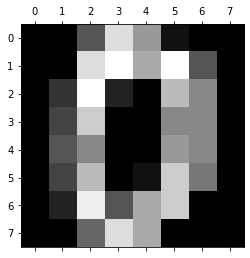

In [25]:
plt.gray()
plt.matshow(digits.images[0])

In [26]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [27]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size=0.2 )

In [31]:
len(X_test)

360

In [32]:
len(X_train)

1437

In [33]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()

In [34]:
model.fit(X_train , Y_train)

C:\Users\ASUS\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [35]:
model.score(X_test , Y_test)

0.9472222222222222

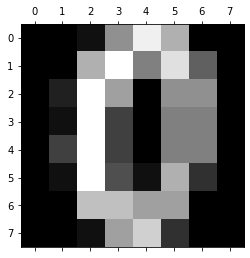

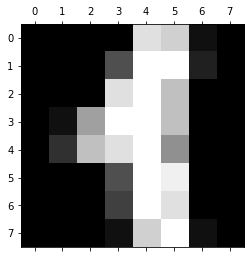

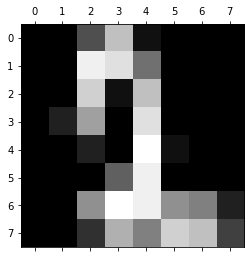

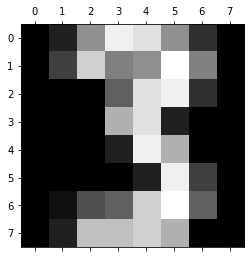

In [53]:
for i in range(10,14,1):
    plt.matshow(digits.images[i])

In [54]:
digits.target[10:14]

array([0, 1, 2, 3])

In [55]:
model.predict(digits.data[10:14])

array([0, 1, 2, 3])

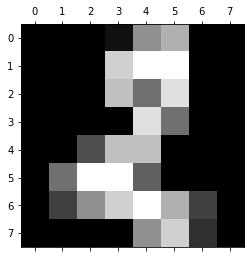

In [56]:
plt.matshow(digits.images[57])

In [57]:
digits.target[57]

2

In [58]:
model.predict([digits.data[57]])

array([2])

In [70]:
Y_predicted  = model.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_test , Y_predicted)
cm

array([[34,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 31,  0,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  3, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  2,  0,  0],
       [ 0,  1,  0,  0, 31,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 40,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 32,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  1],
       [ 1,  1,  0,  0,  1,  0,  0,  0, 27,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 41]], dtype=int64)

In [30]:
plt.figure(figsize = (10, 7))
sns.heatmap(cm , annot = True)
plt.xlabel("Values")
plt.ylabel("Predicted")

NameError: name 'sns' is not defined

<Figure size 720x504 with 0 Axes>

# DECISION TREE

In [16]:
company = ['google','google','google','google','google','google','abc pharma','abc pharma','abc pharma','abc pharma','facebook','facebook','facebook','facebook','facebook','facebook']
job = ['sales executive','sales executive','business manager','business manager','computer programmer','computer programmer','sales executive','computer programmer','business manager','business manager','sales executive','sales executive','business manager','business manager','computer programmer','computer programmer']
degree = ['bachelors','masters','bachelors','masters','bachelors','masters','masters','bachelors','bachelors','masters','bachelors','masters','bachelors','masters','bachelors','masters']
huge_salary = [0,0,1,1,0,1,0,0,0,1,1,1,1,1,1,1] 

In [17]:
df = pd.DataFrame({'company' : company , 'job' : job , 'degree' : degree , 'huge_salary' : huge_salary})
df

,company,job,degree,huge_salary
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [18]:
inputs = df.drop("huge_salary",axis = 'columns') 
target = df['huge_salary']

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [21]:
inputs ['company_n'] = le_company.fit_transform(inputs ['company'])
inputs ['job_n'] = le_company.fit_transform(inputs ['job'])
inputs ['degree_n'] = le_company.fit_transform(inputs ['degree'])
inputs.head(2)

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1


In [22]:
inputs_n = inputs.drop(['company' , 'job' , 'degree'], axis = 'columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [23]:
from sklearn import tree

In [25]:
model = tree.DecisionTreeClassifier()

In [27]:
model.fit(inputs_n , target)

DecisionTreeClassifier()

In [28]:
model.score(inputs_n , target)

1.0

In [29]:
model.predict([[2,0,1]])

array([1], dtype=int64)

# Support Vector Machine

In [45]:
import pandas as pd 
from sklearn.datasets import load_iris 
iris = load_iris()

In [46]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [47]:
df = pd.DataFrame(iris.data, columns = iris.feature_names) 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [49]:
df['flower_name'] = df['target'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [53]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

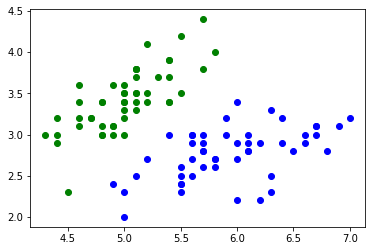

In [56]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue')
# plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red')

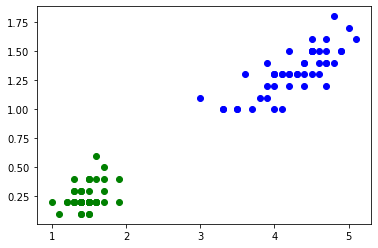

In [58]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue')
# plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='red')

In [59]:
from sklearn.model_selection import train_test_split

In [61]:
X = df.drop(['target' , 'flower_name'] , axis = 'columns')

In [62]:
Y = df['target']

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 )

In [65]:
from sklearn.svm import SVC 
model= SVC()

In [66]:
model.fit(X_train , Y_train)

SVC()

In [67]:
model.score(X_test , Y_test)

0.9666666666666667

# RANDOM FOREST 

In [68]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [71]:
digits = load_digits()

In [73]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [75]:
df = pd.DataFrame(digits.data)
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [77]:
df['target'] = digits.target
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [79]:
X = df.drop(['target'] , axis ='columns')

In [80]:
Y = df.target

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 )

In [85]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier()

In [86]:
model.fit(X_train , Y_train)

RandomForestClassifier()

In [87]:
model.score(X_test , Y_test)

0.9694444444444444

In [88]:
Y_predicted  = model.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_test , Y_predicted)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 35,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 35,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 33,  1],
       [ 0,  1,  0,  0,  0,  2,  0,  0,  0, 36]], dtype=int64)

Text(69.0, 0.5, 'Predicted')

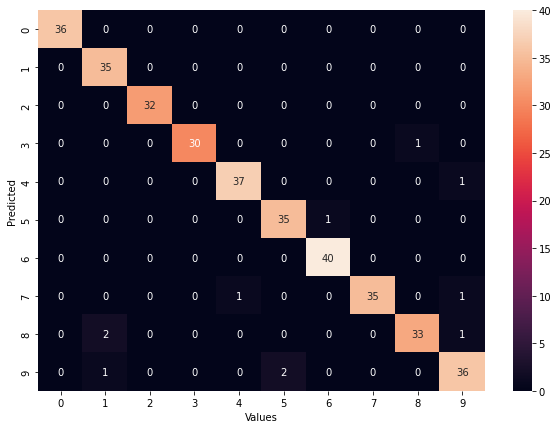

In [90]:
plt.figure(figsize = (10, 7))
sns.heatmap(cm , annot = True)
plt.xlabel("Values")
plt.ylabel("Predicted")

# K-FOLD ALGORITHM

In [22]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
digits = load_digits()

In [23]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test  = train_test_split(digits.data, digits.target, test_size=0.3)

In [24]:
lr = LogisticRegression()
lr.fit(X_train , Y_train)
lr.score(X_test , Y_test)

C:\Users\ASUS\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9703703703703703

In [25]:
svm = SVC()
svm.fit(X_train , Y_train)
svm.score(X_test , Y_test)

0.9907407407407407

In [26]:
rfc = RandomForestClassifier()
rfc.fit(X_train , Y_train)
rfc.score(X_test , Y_test)

0.9814814814814815

### WORKING OF SPLIT() METHOD

In [27]:
from sklearn.model_selection import KFold 
kf=KFold (n_splits=3) 
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [28]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print( train_index , test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


### STRATIFIED FOLD(better version of K Fold as the splitting of dataset is not continous here, it balances the target value)

In [29]:
from sklearn.model_selection import StratifiedKFold 
Folds = StratifiedKFold(n_splits=3)

In [30]:
X = digits.data
Y = digits.target

In [31]:
def get_score(model , X_train , Y_train , X_test , Y_test):
    model.fit(X_train , Y_train)
    return model.score(X_test , Y_test)

In [32]:
score_l = []
score_svm = []
score_rf = []

for train_index, test_index in kf.split(X):
    X_train , Y_train , X_test , Y_test = X[train_index] , Y[train_index] , X[test_index] , Y[test_index]
    score_l.append(get_score(LogisticRegression() ,X_train , Y_train , X_test , Y_test))
    score_svm.append(get_score(SVC() ,X_train , Y_train , X_test , Y_test))
    score_rf.append(get_score(RandomForestClassifier() ,X_train , Y_train , X_test , Y_test))

C:\Users\ASUS\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASUS\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

In [33]:
print (score_l)
print (score_svm)
print (score_rf)

[0.9232053422370617, 0.9415692821368948, 0.9148580968280468]
[0.9666110183639399, 0.9816360601001669, 0.9549248747913188]
[0.9348914858096828, 0.9532554257095158, 0.9265442404006677]


In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
cross_val_score(LogisticRegression(), digits.data, digits.target)

C:\Users\ASUS\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASUS\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

array([0.92222222, 0.86944444, 0.94150418, 0.93871866, 0.89693593])

In [38]:
cross_val_score(SVC(), digits.data, digits.target)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [40]:
cross_val_score(RandomForestClassifier(n_estimators=40), digits.data, digits.target)

array([0.91666667, 0.91111111, 0.95821727, 0.96100279, 0.91364903])

# K-MEANS CLUSTERING

In [2]:
from sklearn.cluster import KMeans

In [3]:
name = ['Rob','Michael','Mohan','Ismail','Kory','Gautam','David','Andrea','Brad','Angelina','Donald','Tom','Arnold','Jared','Stark','Ranbir','Dipika','Priyanka','Nick','Alia','Sid','Abdul']
age = [27,29,29,28,42,39,41,38,36,35,37,26,27,28,29,32,40,41,43,39,41,39]
income = [70000,90000,61000,60000,150000,155000,160000,162000,156000,130000,137000,45000,48000,51000,49500,53000,65000,63000,64000,80000,82000,58000]
df = pd.DataFrame({"name" : name , "age" : age , "income" : income})
df.head(2)

,name,age,income
0,Rob,27,70000
1,Michael,29,90000


In [4]:
km = KMeans(n_clusters = 3)

In [5]:
y_predicted = km.fit_predict(df [['age', 'income']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [6]:
df['cluster'] = y_predicted
df.head(3)

,name,age,income,cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0


Text(0, 0.5, 'income')

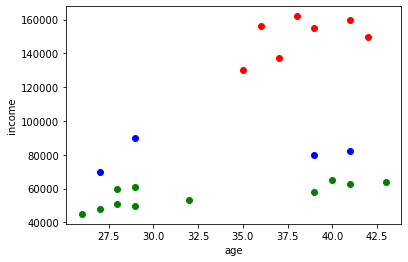

In [7]:
df1 = df[df.cluster==0] 
df2 = df[df.cluster==1] 
df3 = df[df.cluster==2]

plt.scatter(df1.age , df1.income ,color = 'green')
plt.scatter(df2.age , df2.income ,color = 'red')
plt.scatter(df3.age , df3.income ,color = 'blue')

plt.xlabel("age")
plt.ylabel("income")


### WORKING OF MINMAXSCALAR()

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['income']])
df['income'] = scaled
df.head(2)

,name,age,income,cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2


In [10]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['age']])
df['age'] = scaled
df.head(2)

,name,age,income,cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2


### PREDICTION AFTER SCALING

In [11]:
y_predicted = km.fit_predict(df [['age', 'income']])
y_predicted

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [12]:
df['modified_cluster'] = y_predicted
df.head(2)

,name,age,income,cluster,modified_cluster
0,Rob,0.058824,0.213675,2,2
1,Michael,0.176471,0.384615,2,2


In [13]:
centroid = km.cluster_centers_
centroid

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

Text(0, 0.5, 'income')

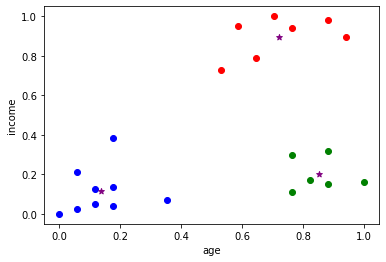

In [14]:
df1 = df[df.modified_cluster==0] 
df2 = df[df.modified_cluster==1] 
df3 = df[df.modified_cluster==2]

plt.scatter(df1.age , df1.income ,color = 'green')
plt.scatter(df2.age , df2.income ,color = 'red')
plt.scatter(df3.age , df3.income ,color = 'blue')
plt.scatter(centroid[: , 0] , centroid[: , 1] ,color = 'purple' , marker ='*')

plt.xlabel("age")
plt.ylabel("income")


### HOW TO SELECT THE NUMBER OF CLUSTERS IN K-MEANS

#### Using the elbow method : Observe the line plot and when the number of clusters decrease doesn't affect much then that will be your number of clusters

In [15]:
krng = range(1,10) 
sse = [] 
for k in krng : 
    km = KMeans(n_clusters=k) 
    km.fit (df[['age' , 'income']]) 
    sse.append(km.inertia_)

C:\Users\ASUS\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


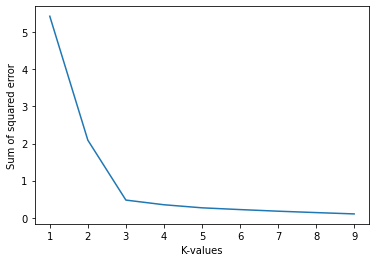

In [16]:
plt.xlabel("K-values") 
plt.ylabel("Sum of squared error") 
plt.plot(krng,sse)

# NAIVE BAYES CLASSIFICATION

In [56]:
df = pd.read_csv("titanic.csv")
df.head(2)

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [57]:
df = df.drop(['PassengerId' , 'Name' , 'SibSp' , 'Parch' , 'Ticket' , 'Cabin' , 'Embarked'] , axis = 'columns')
df.head(10)

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
5,3,male,NaN,8.4583,0
6,1,male,54.0,51.8625,0
7,3,male,2.0,21.0750,0
8,3,female,27.0,11.1333,1
9,2,female,14.0,30.0708,1


In [58]:
target = df.Survived
inputs = df.drop('Survived' , axis = 'columns')

In [59]:
dummies = pd.get_dummies (inputs.Sex)
dummies.head(2)

,female,male
0,0,1
1,1,0


In [60]:
inputs = pd.concat([inputs, dummies], axis = 'columns')
inputs.head(2)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0


In [61]:
inputs.drop('Sex',axis = 'columns', inplace = True)
inputs.head(2)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0


In [62]:
inputs.isna().any()

Pclass    False
Age        True
Fare      False
female    False
male      False
dtype: bool

In [63]:
inputs.isna().sum()

Pclass      0
Age       177
Fare        0
female      0
male        0
dtype: int64

In [64]:
inputs['Age'] = inputs['Age'].fillna(inputs['Age'].mean())
inputs.head(10)

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
5,3,29.699118,8.4583,0,1
6,1,54.000000,51.8625,0,1
7,3,2.000000,21.0750,0,1
8,3,27.000000,11.1333,1,0
9,2,14.000000,30.0708,1,0


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(inputs, target, test_size=0.2)

In [66]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [68]:
model.fit(X_train , Y_train)

GaussianNB()

In [71]:
model.score(X_test , Y_test)

0.7653631284916201

### 2nd QUESTION

In [73]:
df = pd.read_csv("spam.csv")
df.head(3)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [74]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [78]:
df['spam'] = df ['Category'].apply(lambda x : 1 if x=='spam' else 0)
df.head(3)

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1


In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(df.Message,df.spam, test_size = 0.25)

In [113]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray() [ : 3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [115]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count , Y_train)

MultinomialNB()

In [119]:
emails = [ 'Hey mohan, can we get together to watch football gane tomorrow?',
 'Upto 20% discount on parking. Exclusive offer just for you']
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [123]:
X_test_count = v.transform(X_test.values)
model.score(X_test_count , Y_test)

0.9834888729361091

### How to make a sklearn pipeline

In [124]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer' , CountVectorizer()),
    ('nb' , MultinomialNB())
])


In [126]:
clf.fit(X_train , Y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [127]:
clf.score(X_test , Y_test)

0.9834888729361091

# HYPER PARAMETER TUNING

#### Hyperparameter tuning is the process of finding the best hyperparameters for a machine learning model. Hyperparameters are the configuration settings that are set before training the model and cannot be learned from the data during training. They significantly impact the model's performance and generalization ability. The goal of hyperparameter tuning is to optimize these settings to achieve the best possible model performance on unseen data.

In [48]:
from sklearn import datasets,svm
iris = datasets.load_iris()

In [49]:
df = pd.DataFrame (iris.data, columns = iris.feature_names) 
df['flower'] = iris.target 
df['flower'] = df['flower'].apply(lambda x : iris.target_names[x])
df[48 : 51]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor


In [50]:
X = df.drop('flower',axis = "columns")
Y = iris.target

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(X,Y, test_size = 0.25)

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
cross_val_score(svm.SVC(kernel='linear' ,C=10 ,gamma='auto'), iris.data, iris.target, cv=5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [55]:
cross_val_score(svm. SVC (kernel='rbf', C=10, gamma='auto'), iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [58]:
kernels = ['rbf', 'linear'] 
C = [1,10,20] 
avg_scores = {} 
for kval in kernels : 
    for cval in C : 
        cv_scores = cross_val_score (svm.SVC(kernel=kval, C=cval, gamma= 'auto'), iris.data, iris.target, cv=5) 
        avg_scores [kval + "_" + str(cval)] = np.average(cv_scores)
avg_scores

{'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668,
 'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666}

### GRID SEARCH(to try all the permutation and combination with all the kernals and parameter)

In [60]:
from sklearn.model_selection import GridSearchCV 
clf = GridSearchCV(svm.SVC(gamma = 'auto'),{ 
    'C' : [1,10,20], 
    'kernel' : ['rbf', 'linear'] }, cv=5, return_train_score=False) 
clf.fit(iris.data, iris.target) 
clf.cv_results_

{'mean_fit_time': array([0.00079799, 0.00059824, 0.00059829, 0.00081072, 0.00059953,
        0.00059853]),
 'std_fit_time': array([0.00039899, 0.00048846, 0.0004885 , 0.00040562, 0.00048952,
        0.00048869]),
 'mean_score_time': array([0.00039887, 0.00019965, 0.00039868, 0.00039167, 0.00039787,
        0.00039868]),
 'std_score_time': array([0.00048852, 0.0003993 , 0.00048829, 0.00047983, 0.0004873 ,
        0.00048829]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],


In [62]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000798,0.000399,0.000399,0.000489,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.000598,0.000488,0.000200,0.000399,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.000598,0.000488,0.000399,0.000488,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.000811,0.000406,0.000392,0.000480,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.000600,0.000490,0.000398,0.000487,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.000599,0.000489,0.000399,0.000488,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6


In [63]:
df[['params' , 'param_C' , 'mean_test_score' ]]

,params,param_C,mean_test_score
0,"{'C': 1, 'kernel': 'rbf'}",1,0.980000
1,"{'C': 1, 'kernel': 'linear'}",1,0.980000
2,"{'C': 10, 'kernel': 'rbf'}",10,0.980000
3,"{'C': 10, 'kernel': 'linear'}",10,0.973333
4,"{'C': 20, 'kernel': 'rbf'}",20,0.966667
5,"{'C': 20, 'kernel': 'linear'}",20,0.966667


In [64]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_check_is_fitted',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'in

In [65]:
clf.best_score_

0.9800000000000001

In [66]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

### RANDOMIZED SEARCH(to try random permutation and combination from all the kernals and parameter)

In [68]:
from sklearn.model_selection import RandomizedSearchCV 
clf = RandomizedSearchCV(svm.SVC(gamma = 'auto'),{ 
    'C' : [1,10,20], 
    'kernel' : ['rbf', 'linear'] }, cv=5, return_train_score=False, n_iter=2) 
clf.fit(iris.data, iris.target) 
clf.cv_results_

{'mean_fit_time': array([0.00199304, 0.00099716]),
 'std_fit_time': array([6.31132026e-04, 6.67572021e-07]),
 'mean_score_time': array([0.00099726, 0.00019951]),
 'std_score_time': array([0.00063052, 0.00039902]),
 'param_kernel': masked_array(data=['linear', 'linear'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_C': masked_array(data=[20, 10],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'linear', 'C': 20}, {'kernel': 'linear', 'C': 10}],
 'split0_test_score': array([1., 1.]),
 'split1_test_score': array([1., 1.]),
 'split2_test_score': array([0.9, 0.9]),
 'split3_test_score': array([0.93333333, 0.96666667]),
 'split4_test_score': array([1., 1.]),
 'mean_test_score': array([0.96666667, 0.97333333]),
 'std_test_score': array([0.0421637 , 0.03887301]),
 'rank_test_score': array([2, 1])}

In [69]:
df = pd.DataFrame(clf.cv_results_)
df[['params' , 'param_C' , 'mean_test_score' ]]

,params,param_C,mean_test_score
0,"{'kernel': 'linear', 'C': 20}",20,0.966667
1,"{'kernel': 'linear', 'C': 10}",10,0.973333


### HYPER PARAMETER TUNING

In [70]:
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression

In [71]:
model_params = { 
    'svm' : { 
        'model' : svm.SVC (gamma='auto'), 
        'params' : { 
            'C' : [1,10,20], 
            'kernel' : ['rbf', 'linear'] 
        }
    }, 
    'random forest' : {
        'model' : RandomForestClassifier(), 
        'params' : { 
            'n_estimators' : [1,5,10]
        }
    },
    'logistic regression' : { 
        'model' : LogisticRegression(solver='liblinear',multi_class='auto'), 
        'params' : { 
            'C' : [1,5,10]
        }
    }
}

In [75]:
scores = []
for model_name , mp in model_params.items():
    clf = GridSearchCV(mp['model'] , mp['params'] , cv=5 , return_train_score = False)
    clf.fit(iris.data , iris.target)
    scores.append(
        {'model' : model_name ,
         'best_score' : clf.best_score_ ,
         'best_params' : clf.best_params_
        })

In [76]:
df = pd.DataFrame(scores,columns = ['model', "best_score", "best_params"])
df

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random forest,0.966667,{'n_estimators': 10}
2,logistic regression,0.966667,{'C': 5}


# L1 and L2 REGULARIZATION

In [40]:
df = pd.read_csv("Melbourne_housing.csv")
df = df.drop(['Address' , 'Date' , 'Postcode' , 'YearBuilt' , 'Lattitude' , 'Longtitude'],axis = "columns")
df.head(2)

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,2.5,2.0,1.0,1.0,126.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,Yarra City Council,Northern Metropolitan,4019.0


In [41]:
df.nunique()

Suburb            351
Rooms              12
Type                3
Price            2871
Method              9
SellerG           388
Distance          215
Bedroom2           15
Bathroom           11
Car                15
Landsize         1684
BuildingArea      740
CouncilArea        33
Regionname          8
Propertycount     342
dtype: int64

In [42]:
df.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Distance             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
CouncilArea          3
Regionname           3
Propertycount        3
dtype: int64

In [43]:
df[['Car' , 'Bedroom2' , 'Bathroom' , 'Propertycount' , 'Distance']] = df[['Car' , 'Bedroom2' , 'Bathroom' , 'Propertycount' , 'Distance']].fillna(0)
df.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Distance             0
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
CouncilArea          3
Regionname           3
Propertycount        0
dtype: int64

In [44]:
df['BuildingArea'] = df['BuildingArea'].fillna(df.BuildingArea.mean())
df['Landsize'] = df['Landsize'].fillna(df.Landsize.mean())
df.isnull().sum()

Suburb              0
Rooms               0
Type                0
Price            7610
Method              0
SellerG             0
Distance            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
CouncilArea         3
Regionname          3
Propertycount       0
dtype: int64

In [45]:
df = df.dropna()

In [46]:
df.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

In [47]:
df = pd.get_dummies (df, drop_first=True)
df.head(3)

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Suburb_Aberfeldie,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,160.2564,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0000,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0000,4019.0,0,...,0,1,0,0,1,0,0,0,0,0


In [48]:
X = df.drop('Price',axis = 'columns')
Y=df['Price']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(X,Y, test_size = 0.25)

In [59]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train , Y_train)

In [60]:
reg.score(X_test , Y_test)

0.6703981667506891

In [61]:
reg.score(X_train , Y_train)

0.6799153965542317

In [68]:
from sklearn import linear_model 
lasso_reg = linear_model.Lasso(alpha=50, max_iter=1000, tol=0.1) 
lasso_reg.fit(X_train , Y_train)

Lasso(alpha=50, tol=0.1)

In [69]:
lasso_reg.score(X_test , Y_test)

0.6724430345677143

In [71]:
from sklearn.linear_model import Ridge 
ridge_reg = Ridge(alpha=50, max_iter=1000, tol=0.1) 
ridge_reg.fit(X_train , Y_train)

Ridge(alpha=50, max_iter=1000, tol=0.1)

In [73]:
ridge_reg.score(X_test , Y_test)

0.6636516869220139

# K-NEAREST NEIGHBORS CLASSIFICATION

In [74]:
import pandas as pd 
from sklearn.datasets import load_iris 
iris = load_iris()

In [75]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [76]:
df = pd.DataFrame(iris.data, columns = iris.feature_names) 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [77]:
df['target'] = iris.target
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [78]:
df['flower_name'] = df['target'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [79]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

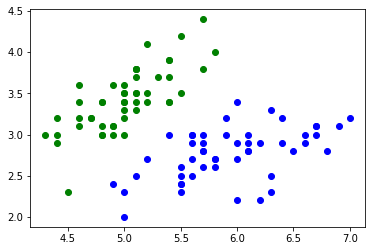

In [80]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue')
# plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red')

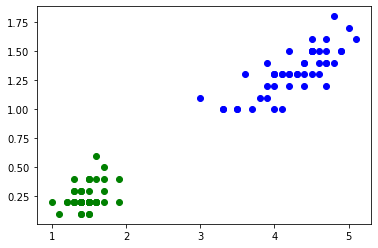

In [81]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue')
# plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='red')

In [82]:
from sklearn.model_selection import train_test_split

In [84]:
X = df.drop(['target' , 'flower_name'] , axis = 'columns')
Y = df['target']

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 )

In [94]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train , Y_train)

KNeighborsClassifier(n_neighbors=3)

In [95]:
knn.score(X_test , Y_test)

0.9666666666666667

In [96]:
from sklearn.metrics import confusion_matrix
y_predicted = knn.predict(X_test)
cm = confusion_matrix(Y_test , y_predicted)

Text(42.0, 0.5, 'Truth')

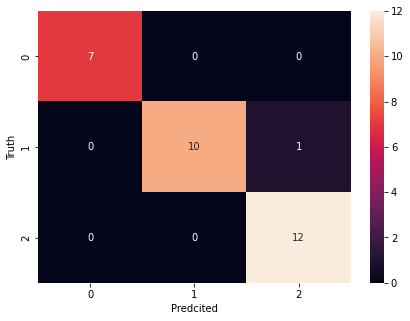

In [97]:
plt.figure(figsize = (7,5))
sns.heatmap(cm , annot =True)
plt.xlabel('Predcited')
plt.ylabel('Truth')

In [98]:
from sklearn.metrics import classification_report

print(classification_report(Y_test , y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# PRINCIPAL COMPONENT ANALYSIS

In [1]:
from sklearn.datasets import load_digits

In [16]:
datasets = load_digits()
df.keys()

RangeIndex(start=0, stop=64, step=1)

In [17]:
datasets.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [18]:
datasets.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [19]:
df = pd.DataFrame(datasets.data)
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [20]:
X = df
Y = datasets.target

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 )

In [25]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train , Y_train)
reg.score(X_test , Y_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9861111111111112

In [28]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
x_pca = pca.fit_transform(X)
x_pca.shape

(1797, 29)

In [29]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [34]:
from sklearn.model_selection import train_test_split
pca_X_train, pca_X_test, Y_train, Y_test = train_test_split(x_pca, Y, test_size=0.2 )

In [35]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(pca_X_train , Y_train)
reg.score(pca_X_test , Y_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5972222222222222

In [33]:
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(X)
x_pca.shape

(1797, 2)

In [36]:
from sklearn.model_selection import train_test_split
pca_X_train, pca_X_test, Y_train, Y_test = train_test_split(x_pca, Y, test_size=0.2 )

In [37]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(pca_X_train , Y_train)
reg.score(pca_X_test , Y_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.625

# VARIANCE AND BIAS

### BIAS : While making predictions, a difference occurs between prediction values made by the model and actual values/expected values, and this difference is known as bias errors or Errors due to bias.
Low Bias: A low bias model will make fewer assumptions about the form of the target function.

High Bias: A model with a high bias makes more assumptions, and the model becomes unable to capture the important features of our dataset. A high bias model also cannot perform well on new data.

### The variance would specify the amount of variation in the prediction if the different training data was used. In simple words, variance tells that how much a random variable is different from its expected value.

Low variance means there is a small variation in the prediction of the target function with changes in the training data set. At the same time, High variance shows a large variation in the prediction of the target function with changes in the training dataset.

### Low-Bias, Low-Variance: The combination of low bias and low variance shows an ideal machine learning model. However, it is not possible practically.
### Low-Bias, High-Variance: With low bias and high variance, model predictions are inconsistent and accurate on average. This case occurs when the model learns with a large number of parameters and hence leads to an overfitting
### High-Bias, Low-Variance: With High bias and low variance, predictions are consistent but inaccurate on average. This case occurs when a model does not learn well with the training dataset or uses few numbers of the parameter. It leads to underfitting problems in the model.
### High-Bias, High-Variance: With high bias and high variance, predictions are inconsistent and also inaccurate on average.

# ENSEMBLE LEARNING

In [6]:
df = pd.read_csv("diabetes.csv")
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
X = df.drop('Outcome' , axis = "columns")
Y = df.Outcome

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled[:3]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415]])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled,Y, stratify=Y, test_size=0.2 )

In [17]:
Y_train.value_counts()

0    400
1    214
Name: Outcome, dtype: int64

In [21]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeClassifier() , X_train , Y_train , cv =5)
scores

array([0.71544715, 0.66666667, 0.71544715, 0.67479675, 0.75409836])

In [22]:
scores.mean()

0.7052912168465947

In [29]:
from sklearn.ensemble import BaggingClassifier 
bag_model= BaggingClassifier( 
    base_estimator = DecisionTreeClassifier(), 
    n_estimators = 100, 
    max_samples = 0.8, 
    oob_score = True, 
    random_state = 0
)
bag_model.fit(X , Y)
bag_model.oob_score_

0.7669270833333334

# FEATURE ENGINEERING

### REMOVE OUTLIERS

In [4]:
name = ['mohan','maria','sakib','tao','virat','khusbu','dmitry','selena','john','imran','jose','deepika','yoseph','binod']
height = [5.9,5.2,5.1,5.5,4.9,5.4,6.2,6.5,7.1,14.5,6.1,5.6,1.2,5.5,]
df = pd.DataFrame({'name' : name , 'height' : height})
df.head(2)

,name,height
0,mohan,5.9
1,maria,5.2


In [36]:
df.describe()

,height
count,14.000000
mean,6.050000
std,2.779804
min,1.200000
25%,5.250000
50%,5.550000
75%,6.175000
max,14.500000


In [37]:
max_thresold = df['height'].quantile(0.95)
max_thresold

9.689999999999998

In [38]:
df[df['height'] > max_thresold]

,name,height
9,imran,14.5


In [39]:
min_thresold = df['height'].quantile(0.05)
min_thresold

3.6050000000000004

In [40]:
df[df['height'] < min_thresold]

,name,height
12,yoseph,1.2


In [41]:
df[(df['height'] < max_thresold) & (df['height'] > min_thresold)]

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


#### 2nd Ques

In [18]:
df = pd.read_csv("bhp.csv")
df.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615


In [19]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [21]:
min_thresold, max_thresold = df.price_per_sqft.quantile([0.001, 0.999])
min_thresold , max_thresold

(1366.184, 50959.36200000099)

In [22]:
df [df.price_per_sqft < min_thresold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5343,other,9 BHK,42000.0,8.0,175.0,9,416
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875


In [23]:
df [df.price_per_sqft > max_thresold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
7012,other,1 BHK,650.0,1.0,500.0,1,76923
7575,other,1 BHK,425.0,1.0,750.0,1,176470
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150


In [25]:
df[(df['price_per_sqft'] < max_thresold) & (df['price_per_sqft'] > min_thresold)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


### IDENTIFY OUTLIERS USING BELL METHOD

### A bell curve is a common type of distribution for a variable, also known as the normal distribution. The term "bell curve" originates from the fact that the graph used to depict a normal distribution consists of a symmetrical bell-shaped curve.

### The highest point on the curve, or the top of the bell, represents the most probable event in a series of data (its mean, mode, and median in this case), while all other possible occurrences are symmetrically distributed around the mean, creating a downward-sloping curve on each side of the peak. The width of the bell curve is described by its standard deviation.

In [5]:
df = pd.read_csv("heights.csv")
df.head(2)

,gender,height
0,Male,73.847017
1,Male,68.781904


In [6]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


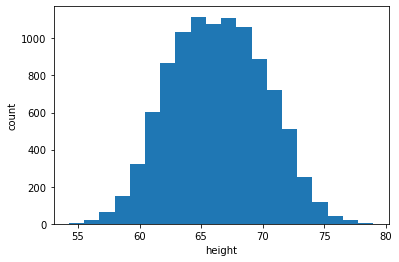

In [44]:
plt.hist(df.height , bins=20)
plt.xlabel("height")
plt.ylabel("count")
plt.show()

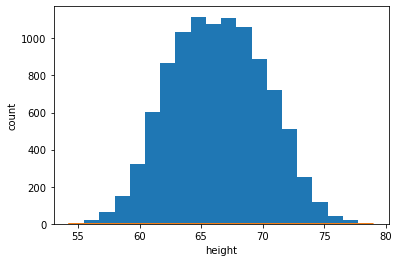

In [51]:
from scipy.stats import norm
plt.hist(df.height , bins=20)
plt.xlabel("height")
plt.ylabel("count")

rng = np.arange(df.height.min() , df.height.max() , 0.1)
plt.plot(rng , norm.pdf(rng , df.height.mean() , df.height.std()))

### IDENTIFY OUTLIERS USING STANDARD DEVIATION

#### 1st Std Dev : std
#### 2nd Std Dev: 2*std  ... so on

In [55]:
upper_limit = df.height.mean() + 3*df.height.std()
lower_limit = df.height.mean() - 3*df.height.std()

In [56]:
df[(df.height > upper_limit) | (df.height < lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [60]:
df_no_outlier_std_dev = df[(df.height<upper_limit) & (df.height>lower_limit)]
df_no_outlier_std_dev.head(2)

,gender,height
0,Male,73.847017
1,Male,68.781904


### IDENTIFY OUTLIERS USING Z-SCORE

### Outlier detection and removal using Z Score.
### Z score is a way to achieve same thing that we did above above.
### Z score indicates how many standard deviation away a data point is. 
### For example in our case mean is 66.37 and standard deviation is 3.84. If a value of a data point is 77.91 then Z score for that is 3 pecause it is 3 standard deviation away

In [7]:
df['z_score'] = (df.height - df.height.mean())/df.height.std()
df.head(5)

,gender,height,z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [8]:
df[df['z_score']>3]

,gender,height,z_score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [9]:
df[df['z_score']<-3]

,gender,height,z_score
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [10]:
df[(df['z_score']>3) | (df['z_score']<-3)]

,gender,height,z_score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [11]:
df_no_outlier = df[(df['z_score']<3) | (df['z_score']>-3)]
df_no_outlier.head(2)

,gender,height,z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505


### IQR

In [12]:
name = ['mohan','maria','sakib','tao','virat','khusbu','dmitry','selena','john','imran','jose','deepika','yoseph','binod','gulshan','johnson','donald','aamir','ken','Liu']
height = [1.2,2.3,4.9,5.1,5.2,5.4,5.5,5.5,5.6,5.6,5.8,5.9,6,6.1,6.2,6.5,7.1,14.5,23.2,40.2]
df = pd.DataFrame({'name' : name , 'height' : height})
df.head(2)

,name,height
0,mohan,1.2
1,maria,2.3


In [13]:
df.describe()

,height
count,20.000000
mean,8.390000
std,8.782812
min,1.200000
25%,5.350000
50%,5.700000
75%,6.275000
max,40.200000


In [14]:
Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)

In [15]:
IQR = Q3 - Q1
IQR

0.9249999999999998

In [16]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [17]:
df[(df.height > upper_limit) | (df.height < lower_limit)]

,name,height
0,mohan,1.2
1,maria,2.3
17,aamir,14.5
18,ken,23.2
19,Liu,40.2


In [19]:
df_no_outlier_std_dev = df[(df.height<upper_limit) & (df.height>lower_limit)]
df_no_outlier_std_dev.head(2)

,name,height
2,sakib,4.9
3,tao,5.1
